# Import data dan Library

In [112]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [113]:
#Memuat dataframe dangan header kolom
from google.colab import drive
drive.mount('/content/drive')
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/seeds.csv')

#Lihat 5 baris pertama dataframe
dataset.head(210)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Area,Perimeter,Compactness,Length of Kernel,Width of Kernel,Asymmetry Coefficient,Length of Kernel Groove,Class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


In [114]:
#cek jumlah baris dan kolom dari dataframe
print(dataset.shape)

(210, 8)


In [115]:
#Lihat statistik dataframe
dataset.describe()

,Area,Perimeter,Compactness,Length of Kernel,Width of Kernel,Asymmetry Coefficient,Length of Kernel Groove,Class
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


In [116]:
#Memilih fitur yang akan di klastering
X = dataset.iloc[:, [0, 1, 2, 3, 4, 5, 6]].values

# DBSCAN tanpa pre-procesing

**Penentuan nilai eps dan min_sample yang paling optimal**

In [117]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

eps_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0]
min_samples_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

best_score = float('-inf')  # Inisialisasi dengan nilai terkecil

# Iterasi untuk berbagai nilai eps dan min_samples
for eps_value in eps_values:
    for min_samples_value in min_samples_values:
        dbscan = DBSCAN(eps=eps_value, min_samples=min_samples_value)
        clusters = dbscan.fit_predict(X)

        # Periksa apakah terdapat lebih dari satu kluster
        unique_labels = set(clusters)
        if len(unique_labels) > 1:
            try:
                silhouette_avg = silhouette_score(X, clusters)
                print(f'eps: {eps_value}, min_samples: {min_samples_value}, Silhouette Score: {silhouette_avg}')

                # Memperbarui nilai terbaik jika ditemukan skor yang lebih tinggi
                if silhouette_avg > best_score:
                    best_score = silhouette_avg
                    best_eps = eps_value
                    best_min_samples = min_samples_value
            except ValueError as e:
                print(f"Error: {e}")

# Menampilkan hasil Silhouette Score terbaik
print(f'Best Silhouette Score: {best_score} dengan eps={best_eps} dan min_samples={best_min_samples}')

Error: Number of labels is 210. Valid values are 2 to n_samples - 1 (inclusive)
eps: 0.2, min_samples: 1, Silhouette Score: 0.026476783337899743
eps: 0.2, min_samples: 2, Silhouette Score: -0.5407425524932737
eps: 0.3, min_samples: 1, Silhouette Score: 0.12754961473887955
eps: 0.3, min_samples: 2, Silhouette Score: -0.3572414798021797
eps: 0.3, min_samples: 3, Silhouette Score: -0.5350381189923407
eps: 0.4, min_samples: 1, Silhouette Score: 0.1802546508706592
eps: 0.4, min_samples: 2, Silhouette Score: -0.0739148564893898
eps: 0.4, min_samples: 3, Silhouette Score: -0.2451060513690738
eps: 0.4, min_samples: 4, Silhouette Score: -0.3320462245762074
eps: 0.4, min_samples: 5, Silhouette Score: -0.4022809692115891
eps: 0.4, min_samples: 6, Silhouette Score: -0.3153897088427905
eps: 0.5, min_samples: 1, Silhouette Score: 0.058379256871207416
eps: 0.5, min_samples: 2, Silhouette Score: -0.038228336556850144
eps: 0.5, min_samples: 3, Silhouette Score: -0.11557469555104274
eps: 0.5, min_sample

**Klasifikasi dengan DBSCAN**

      Area  Perimeter  Compactness  Length of Kernel  Width of Kernel  \
0    15.26      14.84       0.8710             5.763            3.312   
1    14.88      14.57       0.8811             5.554            3.333   
2    14.29      14.09       0.9050             5.291            3.337   
3    13.84      13.94       0.8955             5.324            3.379   
4    16.14      14.99       0.9034             5.658            3.562   
..     ...        ...          ...               ...              ...   
205  12.19      13.20       0.8783             5.137            2.981   
206  11.23      12.88       0.8511             5.140            2.795   
207  13.20      13.66       0.8883             5.236            3.232   
208  11.84      13.21       0.8521             5.175            2.836   
209  12.30      13.34       0.8684             5.243            2.974   

     Asymmetry Coefficient  Length of Kernel Groove  Class  Cluster  
0                    2.221                    5.220  

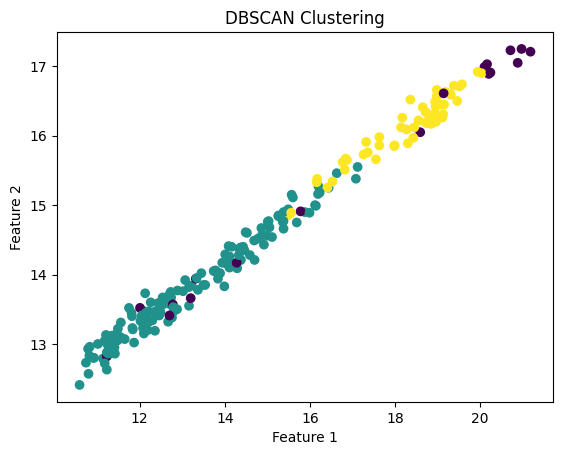

In [118]:
# Menggunakan algoritma DBSCAN
# Anda dapat menyesuaikan nilai epsilon dan min_samples sesuai kebutuhan
dbscan = DBSCAN(eps=1.1, min_samples=9)
clusters = dbscan.fit_predict(X)

# Menambahkan kolom cluster ke dataset
dataset['Cluster'] = clusters

# Menampilkan hasil klastering
print(dataset)

# Visualisasi hasil klastering
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [119]:
silhouette_avg = silhouette_score(X, clusters)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.4022803478736927


# Pre-procesing

**Penanganan Data Duplikat** : Memastikan bahwa data dalam dataframe tidak ada yang terduplikat

In [120]:
# Jumlah data sebelum penanganan data duplikat
jumlah_data_sebelum = len(X)

# Penanganan data duplikat
X = pd.DataFrame(X)  # Mengubah objek X menjadi DataFrame pandas
X = X.drop_duplicates()  # Menghapus data duplikat

# Jumlah data setelah penanganan data duplikat
jumlah_data_setelah = len(X)

# Menampilkan semua data yang telah dilakukan penanganan data duplikat
print("1. Jumlah data sebelum penanganan data duplikat:", jumlah_data_sebelum)
print("2. Jumlah data setelah penanganan data duplikat:", jumlah_data_setelah)
print("3. Data setelah penanganan data duplikat:")
print(X)

1. Jumlah data sebelum penanganan data duplikat: 210
2. Jumlah data setelah penanganan data duplikat: 210
3. Data setelah penanganan data duplikat:
         0      1       2      3      4      5      6
0    15.26  14.84  0.8710  5.763  3.312  2.221  5.220
1    14.88  14.57  0.8811  5.554  3.333  1.018  4.956
2    14.29  14.09  0.9050  5.291  3.337  2.699  4.825
3    13.84  13.94  0.8955  5.324  3.379  2.259  4.805
4    16.14  14.99  0.9034  5.658  3.562  1.355  5.175
..     ...    ...     ...    ...    ...    ...    ...
205  12.19  13.20  0.8783  5.137  2.981  3.631  4.870
206  11.23  12.88  0.8511  5.140  2.795  4.325  5.003
207  13.20  13.66  0.8883  5.236  3.232  8.315  5.056
208  11.84  13.21  0.8521  5.175  2.836  3.598  5.044
209  12.30  13.34  0.8684  5.243  2.974  5.637  5.063

[210 rows x 7 columns]


**Penanganan Data Hilang (missing value)** : Mengatasi nilai-nilai yang kosong atau hilang dalam dataframe

In [121]:
#Cek missing value
missing_value_cek = X.isnull().sum()
missing_value_cek

0    0
1    0
2    0
3    0
4    0
5    0
6    0
dtype: int64

**Standarisasi** : Mengubah skala atau rentang atribut dalam dataset
agar memiliki skala yang seragam

In [122]:
scaler = StandardScaler()
standardized = scaler.fit_transform(X)

stardardized_data = pd.DataFrame(standardized)
stardardized_data.head()

,0,1,2,3,4,5,6
0,0.142098,0.215462,0.000061,0.304218,0.141702,-0.986152,-0.383577
1,0.011188,0.008224,0.428515,-0.168625,0.197432,-1.788166,-0.922013
2,-0.192067,-0.360201,1.442383,-0.763637,0.208048,-0.667479,-1.189192
3,-0.347091,-0.475333,1.039381,-0.688978,0.319508,-0.960818,-1.229983
4,0.445257,0.330595,1.374509,0.066666,0.805159,-1.563495,-0.475356


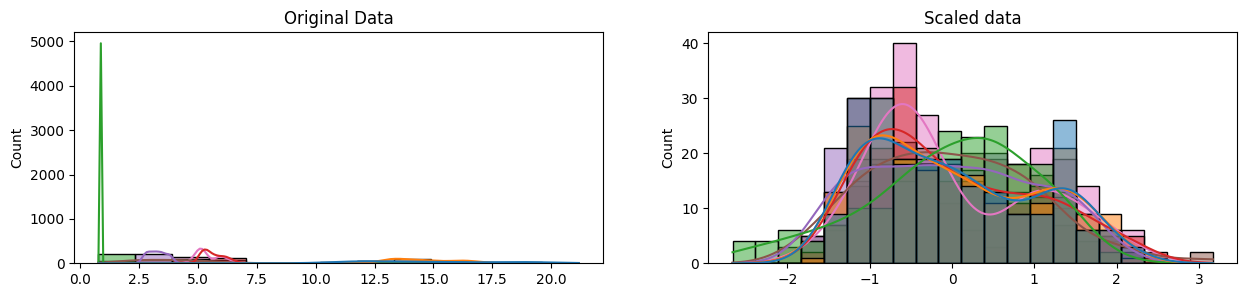

In [123]:
# plot both together to compare
fig, ax = plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(X, ax=ax[0], kde=True, legend=False)
ax[0].set_title("Original Data")
sns.histplot(stardardized_data, ax=ax[1], kde=True, legend=False)
ax[1].set_title("Scaled data")
plt.show()

# DBSCAN setelah pre-procesing

**Penentuan nilai eps dan min_sample yang paling optimal**

In [129]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

eps_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0]
min_samples_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

best_score = float('-inf')  # Inisialisasi dengan nilai terkecil

# Iterasi untuk berbagai nilai eps dan min_samples
for eps_value in eps_values:
    for min_samples_value in min_samples_values:
        dbscan = DBSCAN(eps=eps_value, min_samples=min_samples_value)
        clusters = dbscan.fit_predict(stardardized_data)

        # Periksa apakah terdapat lebih dari satu kluster
        unique_labels = set(clusters)
        if len(unique_labels) > 1:
            try:
                silhouette_avg = silhouette_score(stardardized_data, clusters)
                print(f'eps: {eps_value}, min_samples: {min_samples_value}, Silhouette Score: {silhouette_avg}')

                # Memperbarui nilai terbaik jika ditemukan skor yang lebih tinggi
                if silhouette_avg > best_score:
                    best_score = silhouette_avg
                    best_eps = eps_value
                    best_min_samples = min_samples_value
            except ValueError as e:
                print(f"Error: {e}")

# Menampilkan hasil Silhouette Score terbaik
print(f'Best Silhouette Score: {best_score} dengan eps={best_eps} dan min_samples={best_min_samples}')

Error: Number of labels is 210. Valid values are 2 to n_samples - 1 (inclusive)
eps: 0.2, min_samples: 1, Silhouette Score: 0.0052492542781531724
eps: 0.2, min_samples: 2, Silhouette Score: -0.17654483777955726
eps: 0.3, min_samples: 1, Silhouette Score: 0.05514940899395215
eps: 0.3, min_samples: 2, Silhouette Score: -0.47355017968724133
eps: 0.4, min_samples: 1, Silhouette Score: 0.09605235239473502
eps: 0.4, min_samples: 2, Silhouette Score: -0.3670313402292047
eps: 0.4, min_samples: 3, Silhouette Score: -0.4758040444237538
eps: 0.5, min_samples: 1, Silhouette Score: 0.10909763848012574
eps: 0.5, min_samples: 2, Silhouette Score: -0.18184926352510003
eps: 0.5, min_samples: 3, Silhouette Score: -0.3409363268767795
eps: 0.5, min_samples: 4, Silhouette Score: -0.4156381480384968
eps: 0.5, min_samples: 5, Silhouette Score: 0.062058138814014466
eps: 0.6, min_samples: 1, Silhouette Score: -0.015556768086027965
eps: 0.6, min_samples: 2, Silhouette Score: -0.12306020541888396
eps: 0.6, min_s

**Klasifikasi dengan DBSCAN**

      Area  Perimeter  Compactness  Length of Kernel  Width of Kernel  \
0    15.26      14.84       0.8710             5.763            3.312   
1    14.88      14.57       0.8811             5.554            3.333   
2    14.29      14.09       0.9050             5.291            3.337   
3    13.84      13.94       0.8955             5.324            3.379   
4    16.14      14.99       0.9034             5.658            3.562   
..     ...        ...          ...               ...              ...   
205  12.19      13.20       0.8783             5.137            2.981   
206  11.23      12.88       0.8511             5.140            2.795   
207  13.20      13.66       0.8883             5.236            3.232   
208  11.84      13.21       0.8521             5.175            2.836   
209  12.30      13.34       0.8684             5.243            2.974   

     Asymmetry Coefficient  Length of Kernel Groove  Class  Cluster  
0                    2.221                    5.220  

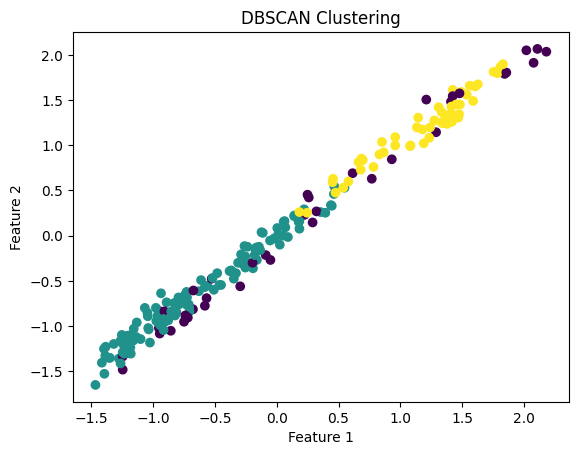

In [127]:
# Standardize the data
scaler = StandardScaler()
standardized_data = scaler.fit_transform(X)

# Using the DBSCAN algorithm
dbscan = DBSCAN(eps=1.0, min_samples=8)
clusters = dbscan.fit_predict(standardized_data)

# Adding the cluster column to the dataset
dataset['Cluster'] = clusters

# Displaying the clustering results
print(dataset)

# Visualizing the clustering results
plt.scatter(standardized_data[:, 0], standardized_data[:, 1], c=clusters, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [128]:
silhouette_avg = silhouette_score(X, clusters)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.2915498451747909
